In [ ]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.8.0


## Objectives
After completing this practical exercise, students should be able to:
1. [Understand how to prevent overfitting in Neural Networks](#over)
2. [Exercise - Develop your own model and try to avoid overfitting](#exc)

### Load Data

Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

Let's prepare the data using the code from Lab 1:

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


## 1. How to prevent overfitting in Neural Networks <a id='over' />

### 1.1 Reducing the network's size 

Our original network was as such:

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now let's try to replace it with this smaller network:

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 75ms/step - loss: 0.4579 - acc: 0.8243 - val_loss: 0.3436 - val_acc: 0.8798
Epoch 2/20
49/49 [==============================] - 3s 55ms/step - loss: 0.2644 - acc: 0.9069 - val_loss: 0.3075 - val_acc: 0.8752
Epoch 3/20
49/49 [==============================] - 3s 65ms/step - loss: 0.2026 - acc: 0.9302 - val_loss: 0.2864 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 2s 49ms/step - loss: 0.1707 - acc: 0.9407 - val_loss: 0.2933 - val_acc: 0.8836
Epoch 5/20
49/49 [==============================] - 4s 74ms/step - loss: 0.1482 - acc: 0.9481 - val_loss: 0.3106 - val_acc: 0.8800
Epoch 6/20
49/49 [==============================] - 3s 68ms/step - loss: 0.1321 - acc: 0.9539 - val_loss: 0.3403 - val_acc: 0.8736
Epoch 7/20
49/49 [==============================] - 2s 47ms/step - loss: 0.1177 - acc: 0.9600 - val_loss: 0.3471 - val_acc: 0.8732
Epoch 8/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1051 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 73ms/step - loss: 0.5435 - acc: 0.8024 - val_loss: 0.4570 - val_acc: 0.8555
Epoch 2/20
49/49 [==============================] - 3s 54ms/step - loss: 0.3780 - acc: 0.8920 - val_loss: 0.3602 - val_acc: 0.8828
Epoch 3/20
49/49 [==============================] - 3s 58ms/step - loss: 0.2923 - acc: 0.9095 - val_loss: 0.3198 - val_acc: 0.8814
Epoch 4/20
49/49 [==============================] - 3s 60ms/step - loss: 0.2431 - acc: 0.9213 - val_loss: 0.2954 - val_acc: 0.8864
Epoch 5/20
49/49 [==============================] - 4s 76ms/step - loss: 0.2111 - acc: 0.9298 - val_loss: 0.2830 - val_acc: 0.8887
Epoch 6/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1883 - acc: 0.9367 - val_loss: 0.2788 - val_acc: 0.8897
Epoch 7/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1700 - acc: 0.9439 - val_loss: 0.2809 - val_acc: 0.8885
Epoch 8/20
49/49 [==============================] - 3s 64ms/step - loss: 0.1556 - a

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

Here's a comparison of the validation losses of the original network and the smaller network. The dots are the validation loss values of 
the smaller network, and the crosses are the initial network (remember: a lower validation loss signals a better model).

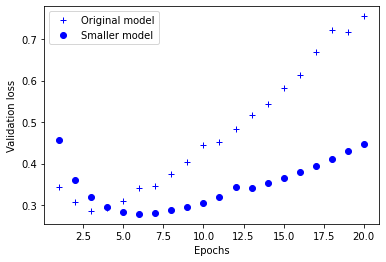

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance 
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 12s 232ms/step - loss: 0.4832 - acc: 0.8147 - val_loss: 0.3078 - val_acc: 0.8730
Epoch 2/20
49/49 [==============================] - 11s 230ms/step - loss: 0.2134 - acc: 0.9135 - val_loss: 0.3202 - val_acc: 0.8708
Epoch 3/20
49/49 [==============================] - 11s 223ms/step - loss: 0.1282 - acc: 0.9518 - val_loss: 0.3551 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 12s 238ms/step - loss: 0.0547 - acc: 0.9823 - val_loss: 0.4880 - val_acc: 0.8806
Epoch 5/20
49/49 [==============================] - 12s 241ms/step - loss: 0.0729 - acc: 0.9869 - val_loss: 0.4868 - val_acc: 0.8798
Epoch 6/20
49/49 [==============================] - 11s 223ms/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.7154 - val_acc: 0.8796
Epoch 7/20
49/49 [==============================] - 11s 225ms/step - loss: 0.1200 - acc: 0.9865 - val_loss: 0.6055 - val_acc: 0.8754
Epoch 8/20
49/49 [==============================] - 11s 227ms/step - 

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the 
crosses are the initial network.

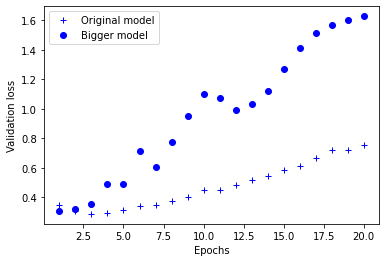

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The bigger network starts overfitting almost right away, after just one epoch, and overfits much more severely. Its validation loss is also 
more noisy.

Meanwhile, here are the training losses for our two networks:

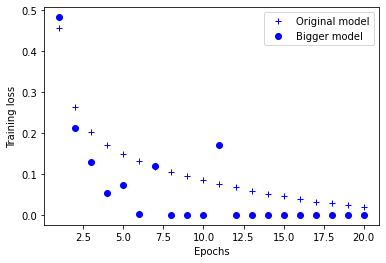

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be 
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large 
difference between the training and validation loss).

### 1.2 Adding weight regularization

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments. Let's add L2 weight regularization to our movie review classification network:

In [ ]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. 

Here's the impact of our L2 regularization penalty:

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 37ms/step - loss: 0.4993 - acc: 0.8178 - val_loss: 0.3906 - val_acc: 0.8707
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3193 - acc: 0.9022 - val_loss: 0.3653 - val_acc: 0.8706
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2721 - acc: 0.9196 - val_loss: 0.3507 - val_acc: 0.8782
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2529 - acc: 0.9276 - val_loss: 0.3371 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 3s 67ms/step - loss: 0.2391 - acc: 0.9325 - val_loss: 0.3440 - val_acc: 0.8841
Epoch 6/20
49/49 [==============================] - 3s 67ms/step - loss: 0.2309 - acc: 0.9366 - val_loss: 0.3808 - val_acc: 0.8705
Epoch 7/20
49/49 [==============================] - 3s 51ms/step - loss: 0.2263 - acc: 0.9386 - val_loss: 0.3608 - val_acc: 0.8787
Epoch 8/20
49/49 [==============================] - 4s 72ms/step - loss: 0.2192 - a

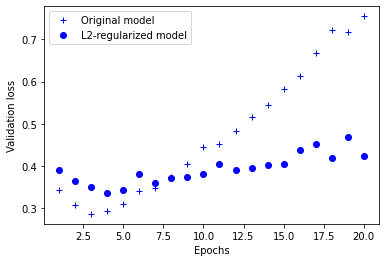

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [ ]:
from tensorflow.keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### 1.3 Adding dropout

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it. Let's add two `Dropout` layers in our IMDB network to see how well they do at reducing overfitting:

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.5633 - acc: 0.7106 - val_loss: 0.4000 - val_acc: 0.8670
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4027 - acc: 0.8395 - val_loss: 0.3098 - val_acc: 0.8853
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3232 - acc: 0.8786 - val_loss: 0.2834 - val_acc: 0.8873
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2766 - acc: 0.9020 - val_loss: 0.2758 - val_acc: 0.8894
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2418 - acc: 0.9170 - val_loss: 0.2825 - val_acc: 0.8894
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2147 - acc: 0.9302 - val_loss: 0.2950 - val_acc: 0.8876
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1909 - acc: 0.9360 - val_loss: 0.3126 - val_acc: 0.8858
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1772 - a

Let's plot the results:

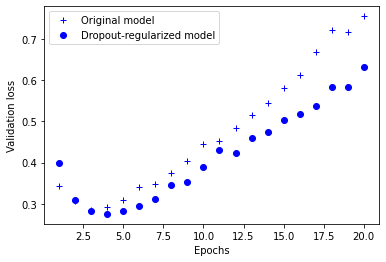

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

## 2. Exercise <a id='exc' />
Please develop your own model for IMDB review classification problem following "The Universal Workflow of Machine Learning" and try to maximize the validation accuracy. When you are regularizing the model you can utilize the below tecniques:
* Add dropout
* Try different architectures: add or remove layers, increase or decrease the number of units per layer
* Add L1 and / or L2 regularization
* Adjust the hyperparameters, e.g. the learning rate of the optimizer, the number of epochs, batch_size and etc.

Provide your codes and comments in the below boxes.